<a href="https://colab.research.google.com/github/moarshy/PyTorch_fastai_Projects/blob/main/BA_AI_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/colab_noteooks'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# The Objective 
*   to understand how and what AI learns 
*   to understand the different buzzwords in AI
*   to better appreciate/understand AI in news
*   to see beyond the AI headline 


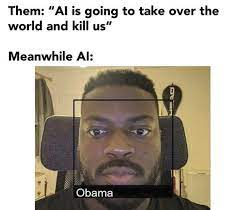



# Today's Scope

1. how machines learn and what they learn
2. buzzwords
3. AI in healthcare today



# Part 1 - How machines learn and what they learn?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/weightheigt.csv').drop('Unnamed: 0', axis=1)

In [ ]:
df.head(5)

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

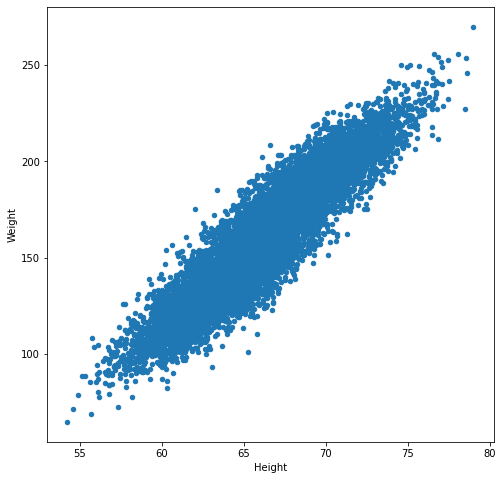

In [ ]:
df.plot('Height', 'Weight', kind='scatter', figsize=(8,8))

High-school maths : Linear Regression

$weight = m(height)+c$

In [ ]:
height = torch.tensor(df.Height.values).unsqueeze(1) 
weight = torch.tensor(df.Weight.values)

m = torch.tensor([-1.], dtype=torch.float64)
m = nn.Parameter(m)

weight_hat = height@m

def mse(y_hat, y): return ((y_hat-y)**2).mean()

def update():
    weight_hat = height@m
    loss = mse(weight_hat, weight) #error
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        m.sub_(lr * m.grad)
        m.grad.zero_()

In [ ]:
lr = 1e-5
for t in range(100): update()

tensor(53170.5601, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(8826.4901, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1859.8120, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(765.3116, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(593.3601, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(566.3456, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(562.1015, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(561.4347, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(561.3300, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(561.3135, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

m = nn.Parameter(torch.tensor([-1.], dtype=torch.float64))

fig = plt.figure()
plt.scatter(height, weight, c='orange')
line, = plt.plot(height, height@m.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(height@m.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

Our first objective

1. what do machines learn

*   m or parameters or weight and biases

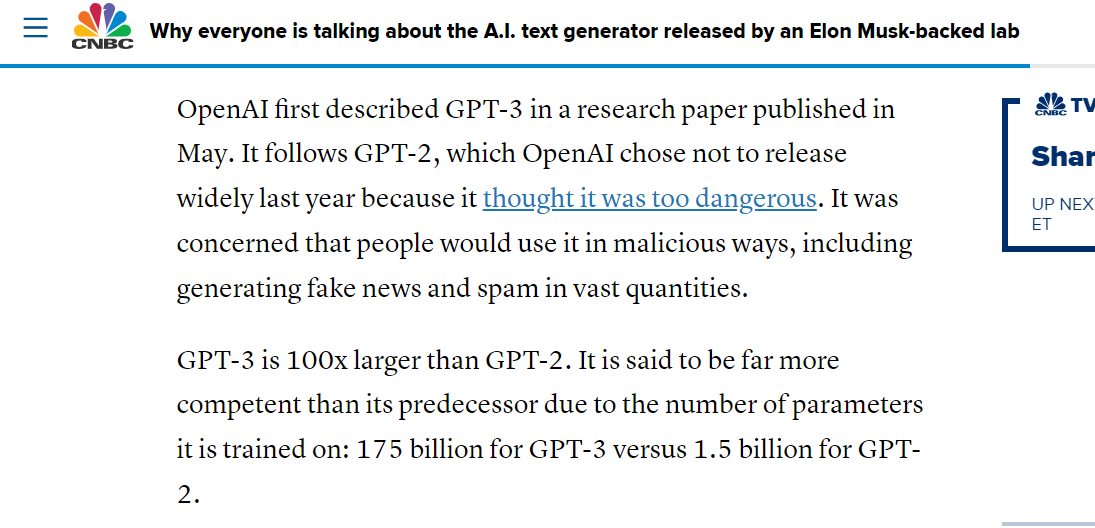



2. How do they learn


*   the need data - labelled data
*   we set up the model
*   train
  * the randomly guess the initial parameter
  * use gradient descent to find the best parameter


# The Buzzwords

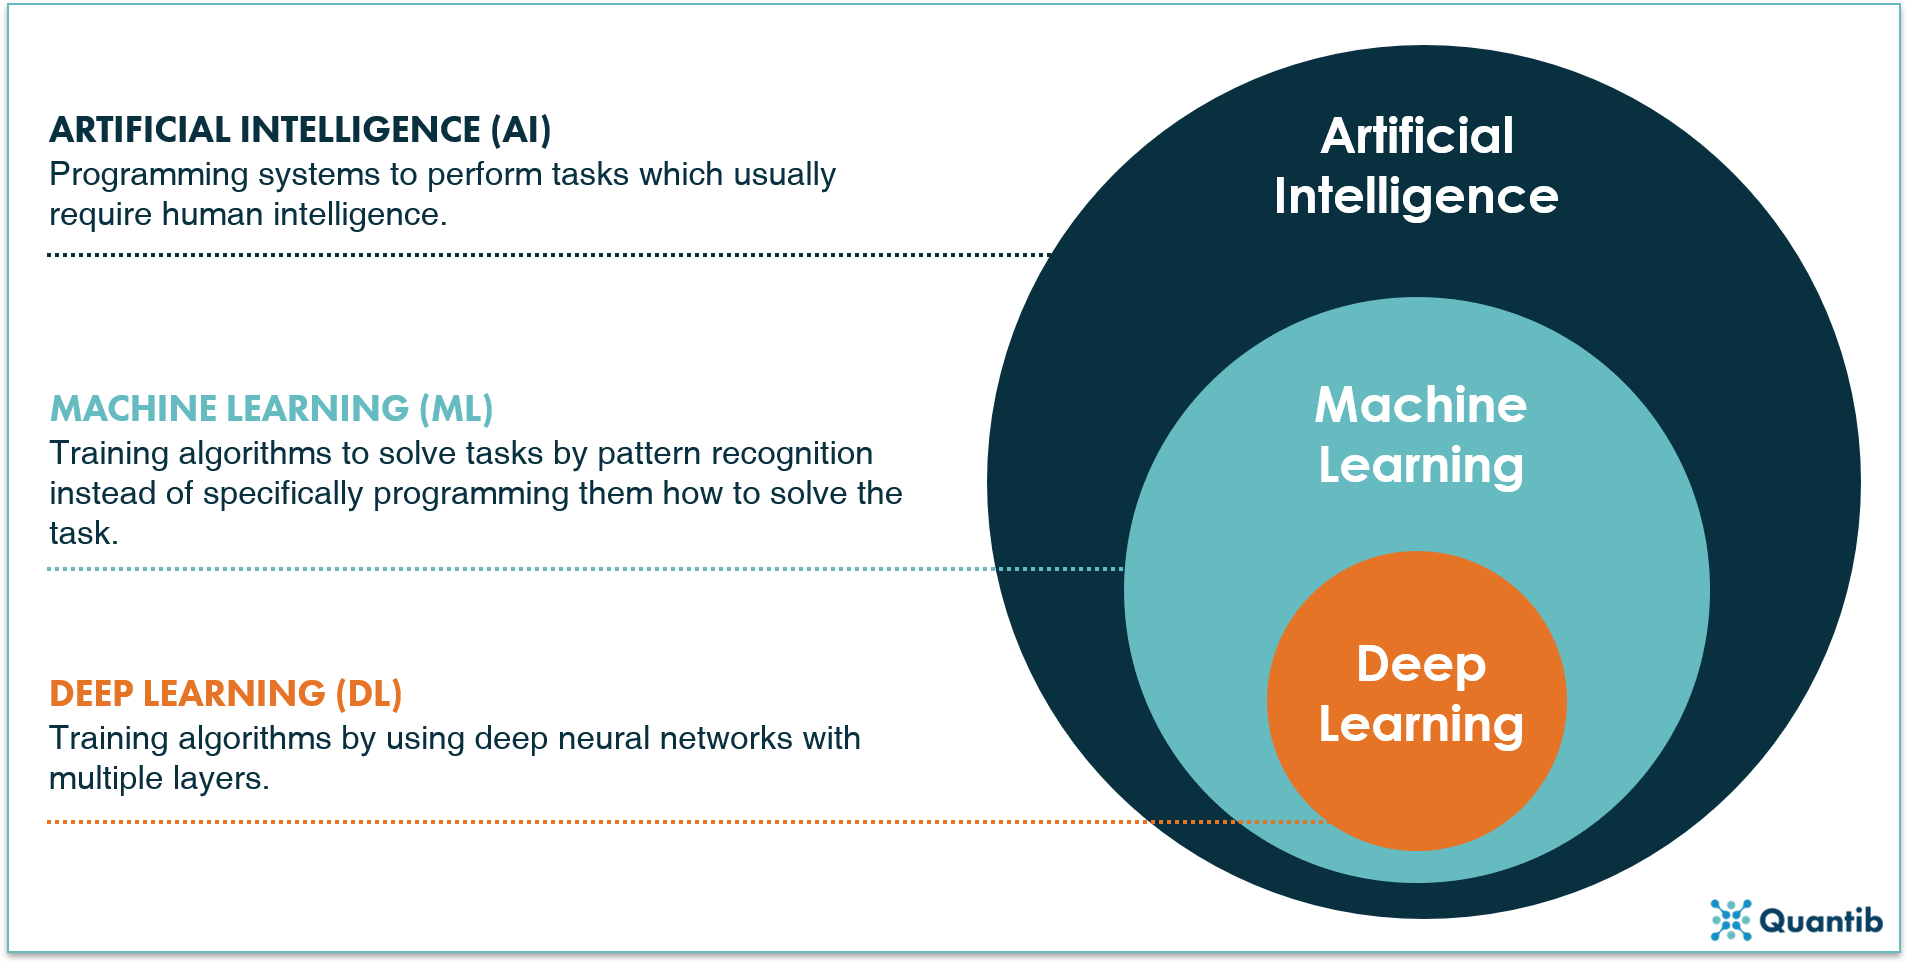

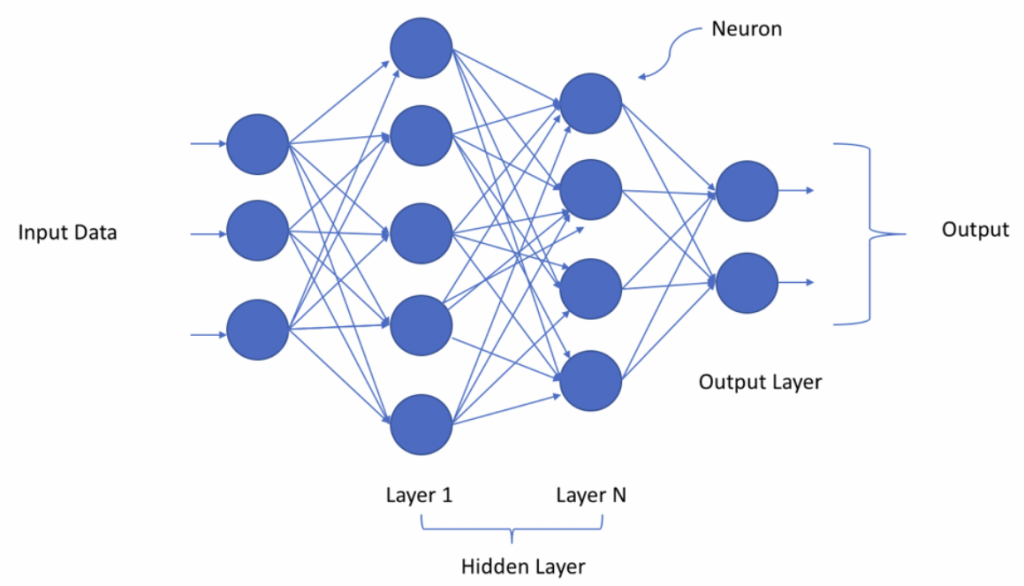

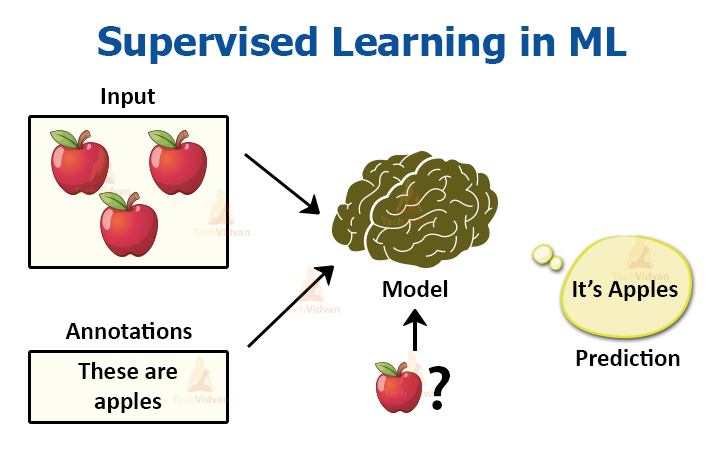

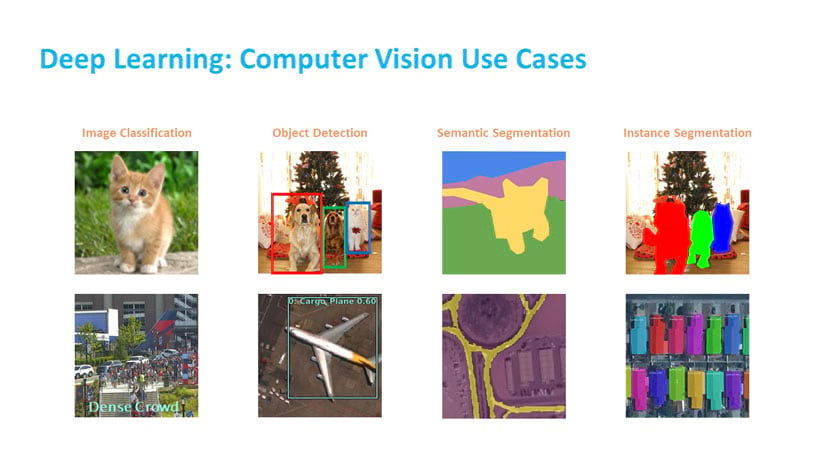

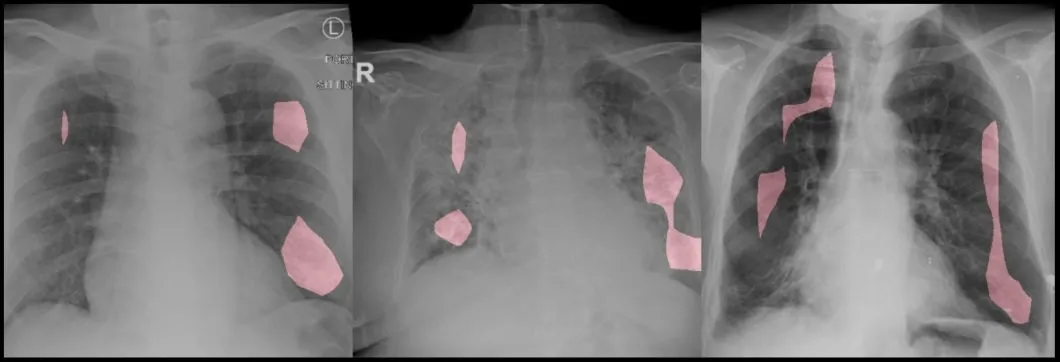

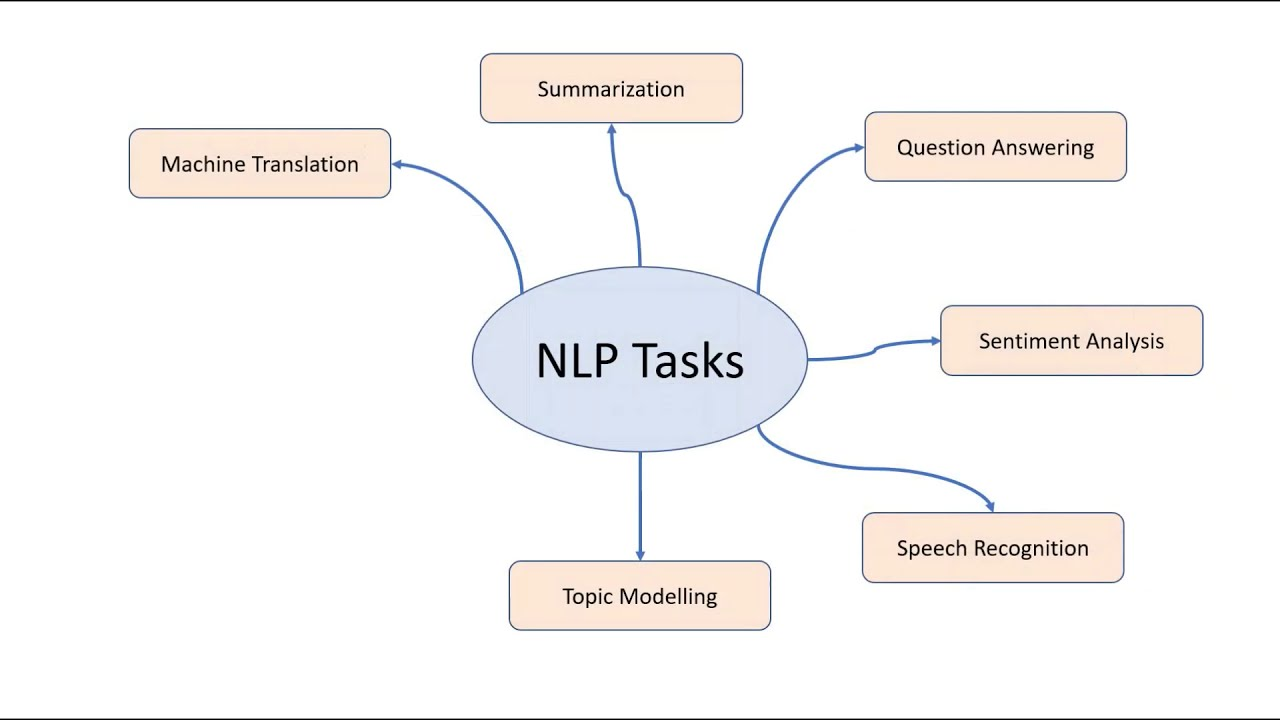

# AI in healthcare

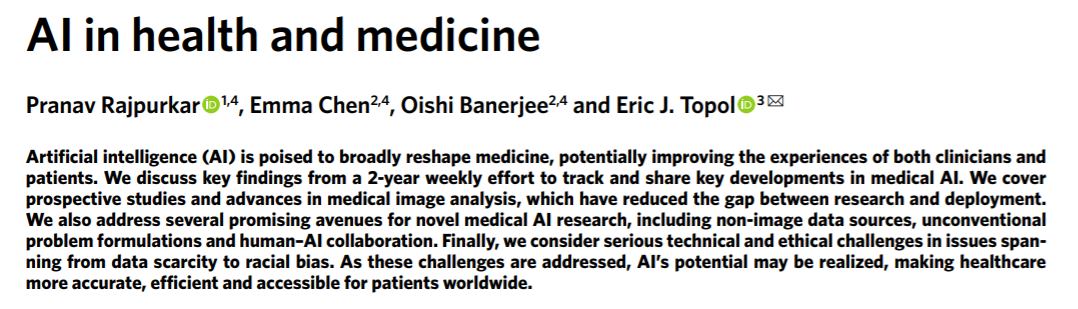

https://www.nature.com/articles/s41591-021-01614-0.pdf

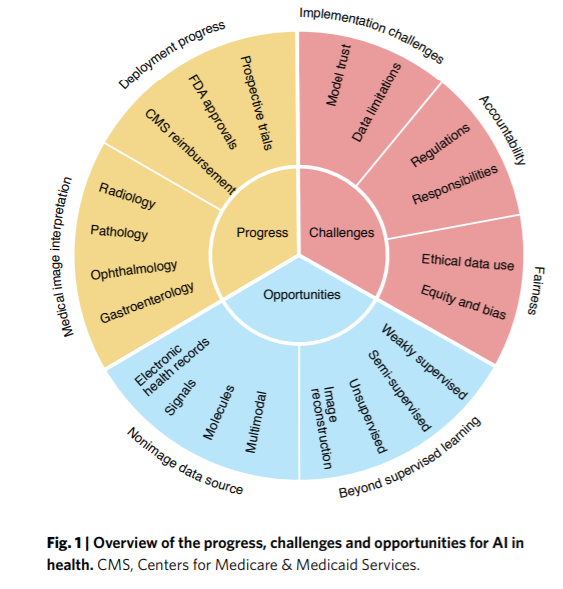

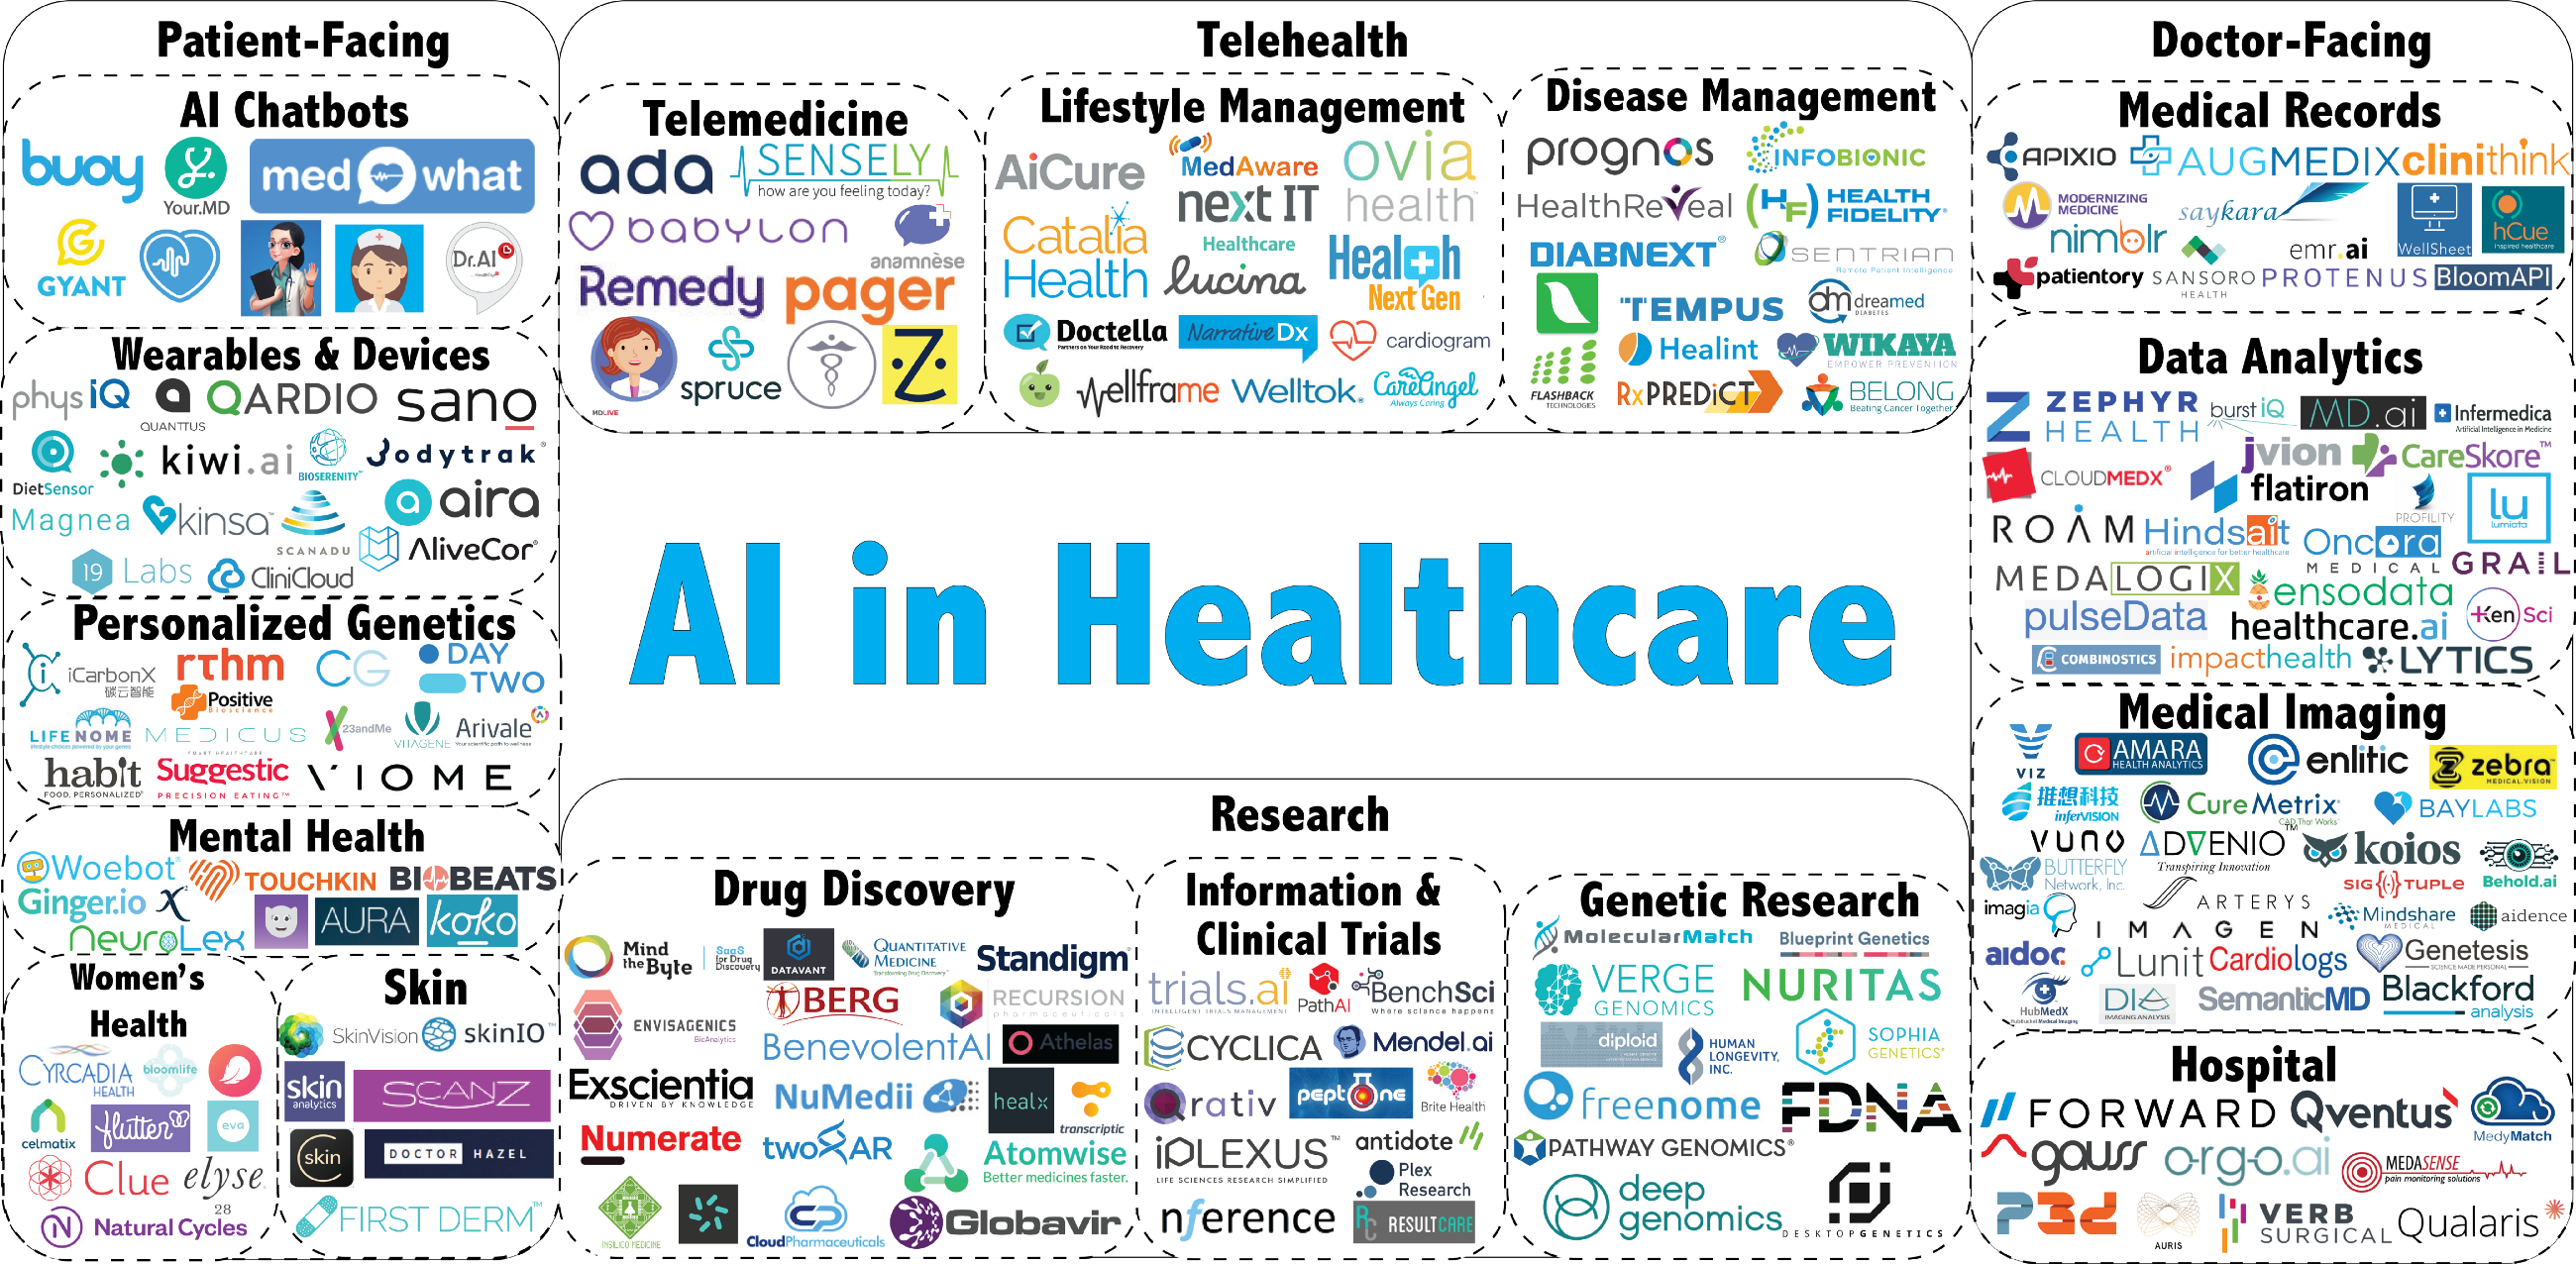

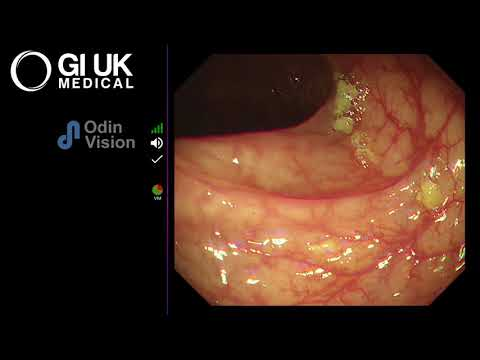

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('zfWgdaxAI54', height=500, width=600)

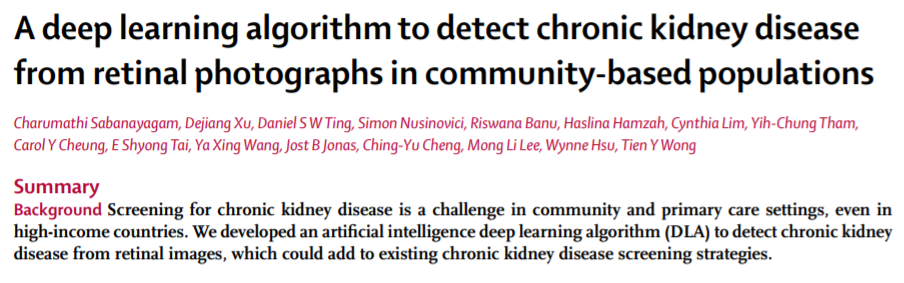

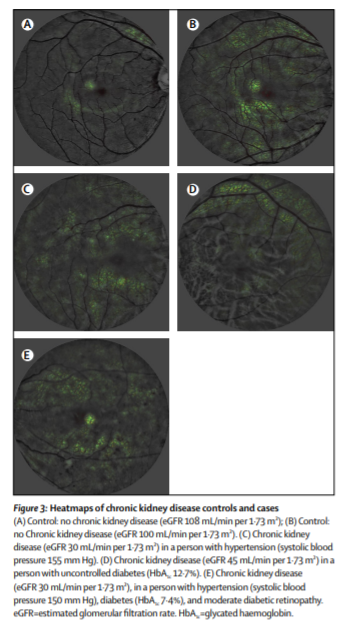

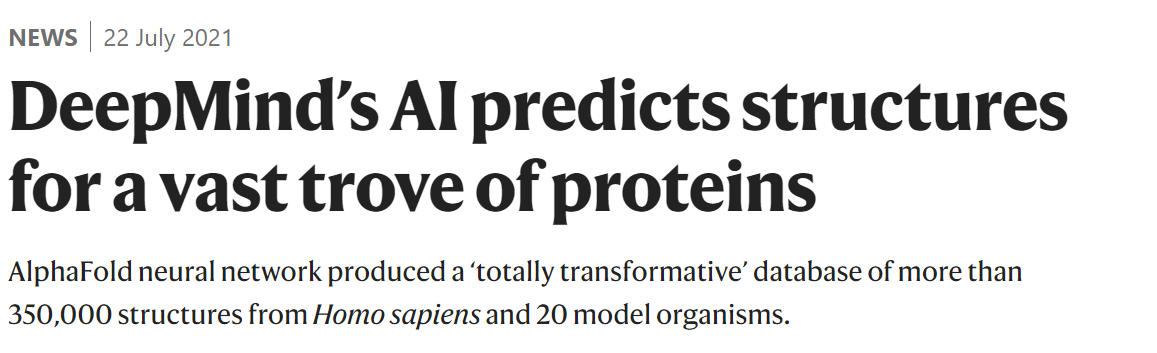

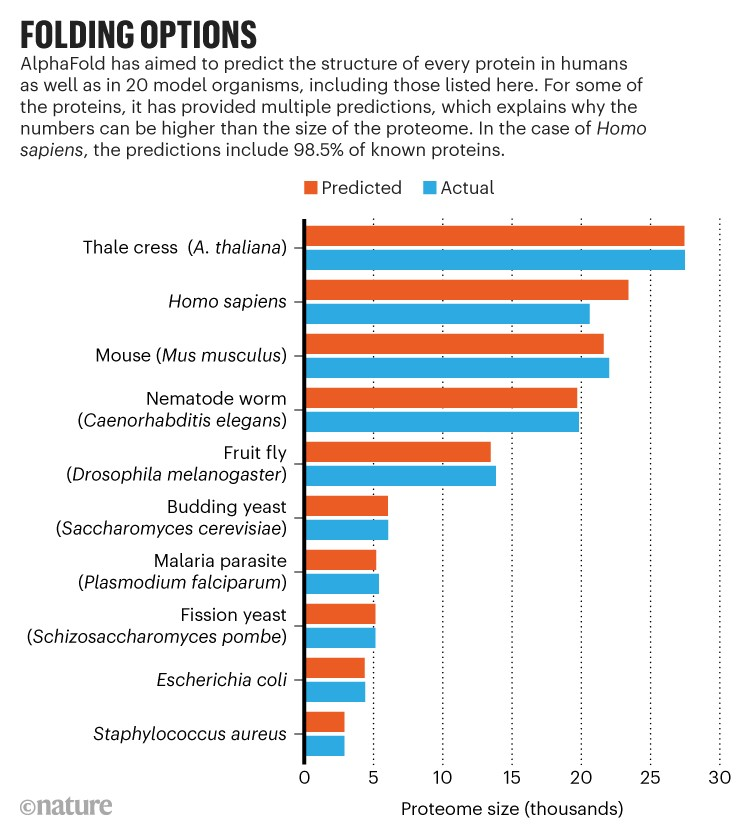